<a href="https://colab.research.google.com/github/paulodiazz/ML/blob/main/AnalisisNCAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data visualization 3
En este documento se abordarán dos problemáticas para el basketball universitario NCAA, una se refiere al ámbito de los fans. Para esto se utilizan visualizaciones de las que se pueden concluir datos que podrían interesar a los fan y se relacionan con el entorno actual.
La segunda parte genera visualizaciones para obtener insigths de los datos ofensivos y defensivos de los equipos, 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import glob
from bokeh.layouts import row,column,gridplot,widgetbox
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, curdoc
from bokeh.models import Arrow, NormalHead, OpenHead, VeeHead, Label, ColumnDataSource,Slider
from IPython.display import display
from IPython.core.display import HTML 
from PIL import Image
from bokeh.models.widgets import Panel, Tabs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




output_notebook()

In [ ]:
df13=pd.read_csv('cbb13.csv',index_col='TEAM')
df14=pd.read_csv('cbb14.csv',index_col='TEAM')
df15=pd.read_csv('cbb15.csv',index_col='TEAM')
df16=pd.read_csv('cbb16.csv',index_col='TEAM')
df17=pd.read_csv('cbb17.csv',index_col='TEAM')
df18=pd.read_csv('cbb18.csv',index_col='TEAM')
df19=pd.read_csv('cbb19.csv',index_col='TEAM')
df20=pd.read_csv('cbb20.csv',index_col='TEAM')
df21=pd.read_csv('cbb21.csv',index_col='TEAM')

In [ ]:
df=[df13,df14,df15,df16,df17,df18,df19,df20,df21]

In [ ]:
df2=[df13,df14,df15,df16,df17,df18,df19]

In [ ]:
print(df20.head())

#EDA de uno de los datasets para explorar la forma de los datos

              RK CONF   G   W  ADJOE  ...  2P_D  3P_O  3P_D  ADJ_T   WAB
TEAM                                  ...                               
Kansas         1  B12  30  28  116.1  ...  42.4  34.1  30.5   67.4  10.8
Baylor         2  B12  30  26  114.5  ...  44.4  35.1  31.1   66.2   8.5
Gonzaga        3  WCC  33  31  121.3  ...  47.4  38.6  32.0   72.0   7.7
Dayton         4  A10  31  29  119.5  ...  45.1  37.1  33.0   67.5   6.8
Michigan St.   5  B10  31  22  114.8  ...  43.4  34.8  28.7   69.3   5.2

[5 rows x 21 columns]


In [ ]:
df19.head()

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
TEAM,,,,,,,,,,,,,,,,,,,,,,
Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,31.5,26.8,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,29.5,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,35.3,22.8,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,24.8,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


In [ ]:
df20.tail()

,RK,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
TEAM,,,,,,,,,,,,,,,,,,,,,
Arkansas Pine Bluff,349,SWAC,29,4,80.1,104.3,0.0461,43.1,48.9,26.2,20.6,27.1,30.7,37.4,46.3,44.6,50.2,26.3,31.1,66.1,-20.0
Maryland Eastern Shore,350,MEAC,31,5,82.1,108.0,0.0411,40.5,51.0,21.1,20.4,26.2,31.0,25.7,36.6,42.5,51.3,25.0,33.7,67.7,-20.8
Mississippi Valley St.,351,SWAC,30,4,89.2,119.0,0.0350,43.0,54.0,18.2,17.6,23.5,35.9,22.9,36.1,42.2,55.5,29.4,34.1,77.4,-22.2
Kennesaw St.,352,ASun,29,1,82.2,112.2,0.0269,39.3,55.3,21.7,18.5,25.8,31.2,32.5,30.4,40.2,55.0,24.8,37.1,68.2,-21.8
Chicago St.,353,WAC,26,4,85.6,120.4,0.0194,45.5,57.5,26.5,16.0,20.6,32.0,42.2,42.5,45.4,55.3,30.4,40.6,69.2,-20.0


In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, Michigan to Belmont
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CONF     347 non-null    object 
 1   G        347 non-null    int64  
 2   W        347 non-null    int64  
 3   ADJOE    347 non-null    float64
 4   ADJDE    347 non-null    float64
 5   BARTHAG  347 non-null    float64
 6   EFG_O    347 non-null    float64
 7   EFG_D    347 non-null    float64
 8   TOR      347 non-null    float64
 9   TORD     347 non-null    float64
 10  ORB      347 non-null    float64
 11  DRB      347 non-null    float64
 12  FTR      347 non-null    float64
 13  FTRD     347 non-null    float64
 14  2P_O     347 non-null    float64
 15  2P_D     347 non-null    float64
 16  3P_O     347 non-null    float64
 17  3P_D     347 non-null    float64
 18  ADJ_T    347 non-null    float64
 19  WAB      347 non-null    float64
 20  SEED     68 non-null     float64
dtypes: float64

In [ ]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, Gonzaga to Maryland Eastern Shore
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CONF        353 non-null    object 
 1   G           353 non-null    int64  
 2   W           353 non-null    int64  
 3   ADJOE       353 non-null    float64
 4   ADJDE       353 non-null    float64
 5   BARTHAG     353 non-null    float64
 6   EFG_O       353 non-null    float64
 7   EFG_D       353 non-null    float64
 8   TOR         353 non-null    float64
 9   TORD        353 non-null    float64
 10  ORB         353 non-null    float64
 11  DRB         353 non-null    float64
 12  FTR         353 non-null    float64
 13  FTRD        353 non-null    float64
 14  2P_O        353 non-null    float64
 15  2P_D        353 non-null    float64
 16  3P_O        353 non-null    float64
 17  3P_D        353 non-null    float64
 18  ADJ_T       353 non-null    float64
 19  WAB      

Hay que tener cuidado porque los ultimos dos sets de datos (2020 y 2021) no tienen la columna POSTSEASON

In [ ]:
#EDA del data set de 2021
df21.describe(include='all')

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
count,347,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,68.000000
unique,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,22.221902,12.060519,101.921902,101.940922,0.493132,49.994236,50.224207,18.972911,18.900865,27.668876,27.974063,31.605187,31.887032,49.702017,49.924207,33.663689,33.838040,68.428530,-5.816715,8.794118
std,NaN,4.040944,5.273373,7.264347,6.148603,0.258964,3.111116,2.879877,2.259102,2.259066,4.325788,3.174413,4.701288,5.499887,3.485755,3.431433,2.731555,2.492589,2.689837,5.278143,4.698551
min,NaN,5.000000,0.000000,80.000000,86.300000,0.008700,41.300000,42.900000,13.300000,12.600000,15.300000,19.700000,19.600000,19.700000,38.300000,41.600000,25.100000,26.100000,59.900000,-17.800000,1.000000
25%,NaN,20.000000,8.500000,97.200000,97.600000,0.273100,48.000000,48.100000,17.250000,17.500000,24.550000,25.700000,28.100000,28.000000,47.350000,47.400000,31.900000,32.250000,66.500000,-9.400000,5.000000
50%,NaN,23.000000,12.000000,101.700000,102.000000,0.488200,50.000000,50.100000,18.900000,18.700000,27.800000,27.900000,31.400000,31.600000,49.700000,49.900000,33.700000,33.900000,68.300000,-6.100000,9.000000
75%,NaN,25.000000,16.000000,106.700000,106.200000,0.719250,51.850000,52.100000,20.600000,20.300000,30.500000,30.250000,34.600000,35.100000,51.850000,52.100000,35.500000,35.500000,70.300000,-2.500000,13.000000


In [ ]:
#Las columnas G y W representan el total de juegos y el número de juegos ganados, para empezar
#el análisis de los datos se hizo esta figura de bokeh con algunas anotaciones. Los gráficos interactivos de bokeh
#permiten al lector haces zoom si desea más detalle de los datos.
#Se encontraron algunos valores atípicos que se explican despues del gráfico
p1 = figure(title="Temporada 2013", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')
p2 = figure(title="Temporada 2014", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')
p3 = figure(title="Temporada 2015", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')
p4 = figure(title="Temporada 2016", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')
p5 = figure(title="Temporada 2017", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')
p6 = figure(title="Temporada 2018", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')
p7 = figure(title="Temporada 2019", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')
p8 = figure(title="Temporada 2020", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')
p9 = figure(title="Temporada 2021", plot_width=250, plot_height=250,x_axis_label='Total de Juegos en la temporada', y_axis_label='Juegos Ganados')

temporadas=['2013','2014','2015','2016','2017','2018','2019','2020','2021']
p1.cross('G','W',source=df13) 


p2.cross('G','W',source=df14)
p3.cross('G','W',source=df15)
p4.cross('G','W',source=df16)
p5.cross('G','W',source=df17)
p6.cross('G','W',source=df18)
p7.cross('G','W',source=df19)
p8.cross('G','W',source=df20)
p9.cross('G','W',source=df21)
p1.add_layout(Arrow(end=VeeHead(line_color="red", line_width=1, fill_color='red',fill_alpha=.5),
                       line_color='red', line_width=1,
                       x_start=30, y_start=30,
                       x_end=40, y_end=35))
p1.add_layout(Arrow(end=VeeHead(line_color="red", line_width=1, fill_color='red',fill_alpha=.5),
                       line_color='red', line_width=1,
                       x_start=30, y_start=30,
                       x_end=40, y_end=30))
p2.add_layout(Arrow(end=VeeHead(line_color="red", line_width=1, fill_color='red',fill_alpha=.5),
                       line_color='red', line_width=1,
                       x_start=30, y_start=30,
                       x_end=39, y_end=36))
p3.add_layout(Arrow(end=VeeHead(line_color="red", line_width=1, fill_color='red',fill_alpha=.5),
                       line_color='red', line_width=1,
                       x_start=39, y_start=13,
                       x_end=40, y_end=36))
p9.add_layout(Arrow(end=VeeHead(line_color="red", line_width=1, fill_color='red',fill_alpha=.5),
                       line_color='red', line_width=1,
                       x_start=8, y_start=20,
                       x_end=5, y_end=2))
mytext1 = Label(x=24, y=29, text='finalistas')
mytext2 = Label(x=17, y=28, text='semi finalista')
mytext31= Label(x=34, y=8, text='partidos')
mytext32= Label(x=33, y=4, text='que todos?')
mytext30=Label(x=35, y=12, text='¿Más')
mytext4= Label(x=4, y=21, text='¿Sólo 5 juegos?')
p1.add_layout(mytext1)
p2.add_layout(mytext2)
p3.add_layout(mytext31)
p3.add_layout(mytext32)
p3.add_layout(mytext30)
p9.add_layout(mytext4)
        
     



grid = gridplot([p1,p2,p3,p4,p5,p6,p7,p8,p9], ncols=3, plot_width=250, plot_height=250)
show(grid)


En este gridplot se muestra la relación entre juegos totales y juegos ganados, en las primeras 3 temporadas se muestra el tipo de información que se obtiene de estas visualizaciones, por ejemplo: En 2013, podemos localizar e identificar fácilmente los puntos de los equipos finalistas; En 2014, podemos ver que el equipo que en temporada regular ganó más partidos, fue eliminado en semifinales, por esto jugó menos partidos que los dos finalistas, aunque sea el que más partidos ganó en la temporada, en 2015, hay un equipo que jugó más partidos que todos los demás, podría ser interesante ver la razón que lo causó. En las gráficas de 2016 a 2020, se sigue observando la relación positiva, pero no se encontraron datos interesantes para señalar. En la temporada 2021 se encuentra un valor atípico de un equipo que sólo jugó 5 juegos.



In [ ]:
#En estas gráficas se puede observar una curiosidad en el número de juegos:
#Obtenemos el máximo de juegos que jugó un equipo en cada temporada:
maxgames=[]
for i in range(len(df)):
  maxgames.append(df[i].G.max())
print(maxgames)

[40, 40, 40, 40, 39, 40, 39, 34, 30]


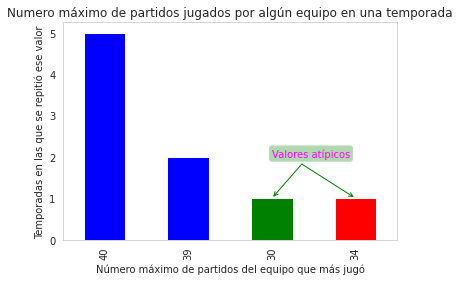

In [ ]:
#Se utilizó la función value_counts() para ver cuantas veces se repetía el mismo valor máximo de juegos en los data sets.
#Para visualizar se utilizó un gráfico categórico ya que el propósito de la visualización es ver
#el número máximo de juegos que pudo tener un equipo en la temporada, la cual es una variable categorica.
#Se utilizó el gráfico de barras porque las variables son números enteros, y no un rango infinito.

mg=pd.Series(maxgames).value_counts()
ax=mg.plot.bar(color=['blue','blue','green','red'], grid=False)

plt.xlabel('Número máximo de partidos del equipo que más jugó')
plt.ylabel('Temporadas en las que se repitió ese valor')
plt.title('Numero máximo de partidos jugados por algún equipo en una temporada')
ax.annotate('Valores atípicos',color='magenta', xy=(2, 1), 
                         xytext=(2,2),bbox=dict(boxstyle='round,pad=0.3',fc='green', alpha=0.3),arrowprops=dict(arrowstyle='->',color='green'))
ax.annotate('',color='magenta', xy=(3, 1), 
                         xytext=(2.3,1.9),bbox=dict(boxstyle='round,pad=0.3',fc='green', alpha=0.3),arrowprops=dict(arrowstyle='->',color='green'))
plt.show()



De la gráfica anterior sabemos que en una temporada regular los equipos finalistas juegan 40 partidos
El valor '39' se repite dos veces, esto se puede explicar ya que es probable que en una temporada algún juego se cancele por diversas razones, dejando al equipo finalista con 39 juegos.
Los valores atípicos señalados tienen una explicación mucho más específica:
Para que el equipo que más jugó, sólo haya podido jugar  30 o 34 partidos significa que TODOS los equipos no jugaron al menos 6 partidos, y bajo circunstancias normales es muy poco probable. Por esto se puede concluir que la temporada 2020, tiene un valor atípico causado por el factor COVID19 que no permitó la realización de los juegos.
Por otro lado, el valor de '30' para el 2021, que también es atípico, se explica por las fuertes medidas sanitarias que se tomaron para poder realizar el torneo, imposibilitando juegos en situaciones de jugadores o miembros del torneo con positivo para COVID.

In [ ]:
mingames=[]

for i in range(len(df)):
  mingames.append(df[i].G.min())
  

In [ ]:
print(mingames)

[22, 15, 24, 24, 25, 24, 26, 24, 5]


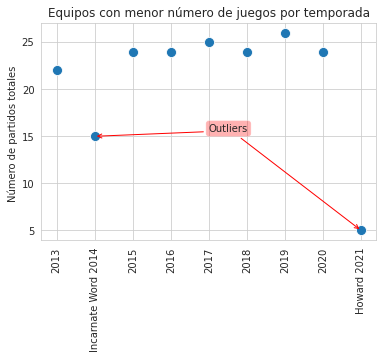

In [ ]:
#Con cierto parecido a la visualización anterior, se desea hacer una visualización de los
#equipos que menos jugaron, en este caso se graficará directamente el número de juegos que jugaron los equipos
#que menos jugaron en cada temporada, a diferencia de la anterior que se contó cuantas veces aparecía cada valor.
#En el caso anterior al haber múltiples equipos con el mismo valor de juegos, fue conveniente agruparlos, en este caso,
#al no tener muchos valores repetidos, conviene usar un scatter plot.
c=['2013','Incarnate Word 2014','2015','2016','2017','2018','2019','2020','Howard 2021']
ax=sns.scatterplot(y=mingames,x=temporadas,s=100)
ax.set_title('Equipos con menor número de juegos por temporada')
ax.set_ylabel('Número de partidos totales ')
ax.annotate('Outliers', xy=(8, 5),  xycoords='data',
            xytext=(.5,.5), textcoords='axes fraction',bbox=dict(boxstyle='round,pad=0.3',fc='red', alpha=0.3),arrowprops=dict(arrowstyle='->',color='red'))
ax.annotate('', xy=(1, 15),  xycoords='data',
            xytext=(.5,.5), textcoords='axes fraction',bbox=dict(boxstyle='round,pad=0.3',fc='red', alpha=0.3),arrowprops=dict(arrowstyle='->',color='red'))
ax.set_xticklabels(c,rotation=90)
plt.show()

Esta gráfica es parecida a la anterior pero con el mínimo de partidos que algún equipo jugó en la temporada, la interpretación no es tan sencilla, podemos suponer que en 2021 el equipo que sólo jugó 5 veces tuvo algún problema por la situación mundial de pandemia, en cambio, el valor de 15 juegos que aparece en 2014 no tiene una interpretación directa, pero sería muy interesante investigar que sucedió para que ese equipo jugara sólo 15 veces.

In [ ]:
#Este código se ejecuta para obtener la fila del data frame de 2014, dode 
#se encuentra el equpo que sólo jugó 15 veces.
outlier1=df14[df14['G']==15]
print(outlier1.index)
outlier2=df21[df21['G']==5]
print(outlier2.index)


Index(['Incarnate Word'], dtype='object', name='TEAM')
Index(['Howard'], dtype='object', name='TEAM')


Ahora que conocemos los nombres de los dos equipos es sencillo comprobar si nuestras suposiciones fueron ciertas:



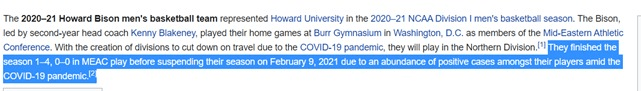

In [ ]:
#Mostrando una imagen local
path="/content/WhatsApp Image 2021-08-27 at 15.14.12 (1).png"
display(Image.open(path))

In [ ]:
#En la columna POSTSEASON, se encuentra la etapa de la temporada en la que el equipo fue eliminado
#De aquí podré saber los valores que debo utilizar si quiero hacer por ejemplo un análisis
#sólo de los equipos que ganaron en su conferencia y pasaron al torneo final de eliminación,
#o en su defecto, como lo haré mas adelante de los campeones.
df17.POSTSEASON.unique()


array(['2ND', 'Champions', 'R32', 'E8', 'S16', 'F4', 'R64', 'R68', nan],
      dtype=object)

In [ ]:
#Obteniendo una lista con los datos de los equipos que quedaron campeones:
#Nótese que se usa df2 y no df para poder acceder en la columna POSTSEASON,
#df contiene tambien datos de 2020 y 2021, en los cuales no está esta columna.
champions=[]
for i in range(len(df2)):
  champions.append(df2[i][df2[i].POSTSEASON=='Champions'])
print(champions)
# champions es una lista de Dataframes



[           CONF   G   W  ADJOE  ADJDE  ...  3P_D  ADJ_T  WAB  POSTSEASON  SEED
TEAM                                   ...                                    
Louisville   BE  40  35  115.9   84.5  ...  31.8   67.1  9.0   Champions   1.0

[1 rows x 22 columns],              CONF   G   W  ADJOE  ADJDE  ...  3P_D  ADJ_T  WAB  POSTSEASON  SEED
TEAM                                     ...                                    
Connecticut  Amer  40  32  112.5   91.3  ...  33.0   64.8  4.7   Champions   7.0

[1 rows x 22 columns],      CONF   G   W  ADJOE  ADJDE  ...  3P_D  ADJ_T   WAB  POSTSEASON  SEED
TEAM                             ...                                     
Duke  ACC  39  35  125.2   90.6  ...  31.4   66.4  10.7   Champions   1.0

[1 rows x 22 columns],           CONF   G   W  ADJOE  ADJDE  ...  3P_D  ADJ_T  WAB  POSTSEASON  SEED
TEAM                                  ...                                    
Villanova   BE  40  35  123.1   90.9  ...  33.9   66.7  8.9   Champio

In [ ]:
#Ahora que estamos analizando más a fondo los datos, conviene juntar todos los data sets en uno
#
df3=pd.concat(df2)

In [ ]:
is_trueC=df3['POSTSEASON'] == 'Champions'
is_trueF4=df3['POSTSEASON']=='F4'
is_trueR32=df3['POSTSEASON']=='R32'

In [ ]:
#Ahora se tiene un data set con las estadísticas de los equipos que quedaron campeones
dfChampions=df3[is_trueC]

#Para obtener información importante, también se comparará con los datos 
# de los equipos que no llegaron tan lejos en el torneo
dfF4=df3[is_trueF4]
dfR32=df3[is_trueR32]

In [ ]:
#Se crea un data frame con los equipos la columna 'ADJOE' que
# contiene los datos respectivos de la eficiencia ofensiva ajustada
# y la columna 'ADJDE', que contiene la eficiencia defensiva ajustada.
#Esto no es más que los puntos que estos equipos hacen por cada 100 ofensivas,
#y los que permiten por cada 100 defensivas

df4=dfChampions[['ADJOE','ADJDE']]
df5=dfF4[['ADJOE','ADJDE']]
df6=dfR32[['ADJOE','ADJDE']]

In [ ]:
print(df4)


                ADJOE  ADJDE
TEAM                        
Louisville      115.9   84.5
Connecticut     112.5   91.3
Duke            125.2   90.6
Villanova       123.1   90.9
North Carolina  121.0   91.5
Villanova       128.4   94.1
Virginia        123.0   89.9


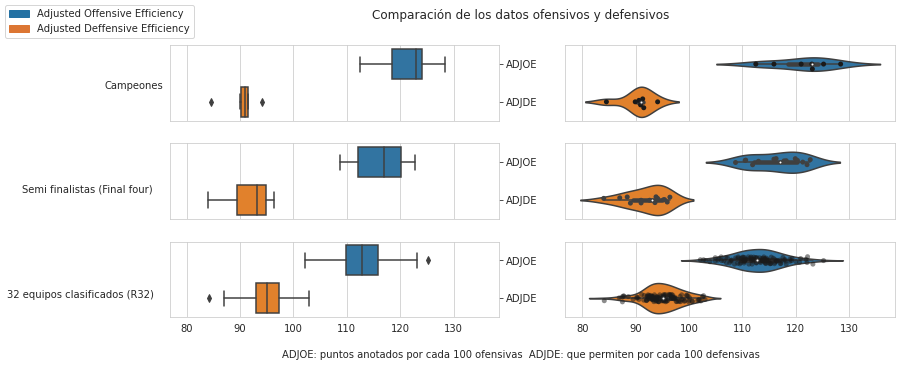

In [ ]:
#En esta seccion se crea una red de subplots, además se utilizaron boxplots y
# violinplots. Un boxplot nos sirve para visualizar la distribución de los 
#datos. A simple vista se pueden visualizar:Primer cuartil, Mediana,
#Tercer cuartil y rango intercuartilico.
# El violin plot adicionalmente nos enseña la densidad de la distribución.
#Se utilizó swarmplot para mejorar la visualización de la distribución.
fig, axs= plt.subplots(3,2,figsize=(13,5),sharex=True)
plt.suptitle('Comparación de los datos ofensivos y defensivos')

sns.set_style('whitegrid')
sns.boxplot(data=df4,orient='h',ax=axs[0,0])
sns.swarmplot(data=df4,orient='h',ax=axs[0,1], color=".1")
sns.violinplot(data=df4,orient='h',ax=axs[0,1])
sns.boxplot(data=df5,orient='h',ax=axs[1,0])
sns.stripplot(data=df5,orient='h',ax=axs[1,1], color=".25")
sns.violinplot(data=df5,orient='h',ax=axs[1,1])
sns.boxplot(data=df6,orient='h',ax=axs[2,0])
sns.stripplot(data=df6,orient='h',ax=axs[2,1], color=".1",alpha=.5)
sns.violinplot(data=df6,orient='h',ax=axs[2,1])
axs[0,0].yaxis.tick_right()
axs[0,1].set_yticks([])
axs[1,0].yaxis.tick_right()
axs[1,1].set_yticks([])
axs[2,0].yaxis.tick_right()
axs[2,1].set_yticks([])
fig.text(0.5,0.02, "ADJOE: puntos anotados por cada 100 ofensivas  ADJDE: que permiten por cada 100 defensivas", ha="center", va="center")
axs[0,0].set_ylabel('Campeones',rotation=0)
axs[0,0].yaxis.set_label_coords(-0.11,.4)
axs[1,0].set_ylabel('Semi finalistas (Final four)',rotation=0)
axs[1,0].yaxis.set_label_coords(-0.25,.32)
axs[2,0].set_ylabel('32 equipos clasificados (R32)',rotation=0)
axs[2,0].yaxis.set_label_coords(-0.27,.23)
plt.subplots_adjust( hspace=.3)
ADJOE_patch = mpatches.Patch(color='#2471A3', label='Adjusted Offensive Efficiency')
ADJDE_patch = mpatches.Patch(color='#DC7633', label='Adjusted Deffensive Efficiency')
fig.legend(handles=[ADJOE_patch,ADJDE_patch],loc=2)

plt.show()

A simple vista esta visualización enseña información muy interesante.
El rango de las eficiencias ofensivas de los campeones se encuentra más a la derecha en el eje x que el rango de ADJOF de los semifinalistas, que a su vez, se encuentra más a la derecha que el de los 32 equipos que clasificaron. Esto es muy lógico y era de esperarse: los equipos campeones, en general, meten más puntos que los demás; aún así la información más interesante que se obtuvo de este gráfico, tiene que ver con la eficacia de la defensiva. Se puede notar como la distribución para la eficiencia defensiva ajustada (ADJDE) en los campeones está completamente concentrada cerca de 90, que sin contar los outliers, el rango es (89.9,91.5), a diferencia de la distribución ofensiva ajustada (ADJOF), la cual se distribuye a lo largo de un rango mucho más grande (112.5,128.4). 
¿Esto que información nos da?
Hay un dicho muy conocido en el basketball que dice: “Attack wins you games, defence wins you titles” - Sir Alex Ferguson.
Interpretando el tamaño de los rangos en donde se distribuyen los datos, nos podemos dar cuenta de la verdad en la frase de Sir Ferguson; dentro de los equipos que ganaron encontramos los equipos con las eficiencias ADJOF más sobresalientes, pero también se encuentran equipos que se quedaron cerca de la media o por incluso debajo de la eficiencia ofensiva del total de equipos de la liga.
En cambio, dentro de los equipos campeones no se encuentra ninguno que no tenga un ADJDE sobresaliente contra los demás equipos. Es posible concluir de esta información que Sir Ferguson estaba en lo correcto.



In [ ]:
#Para profundizar más en esta información, se graficarán juntas  las eficiencias ofensiva y defensiva de cada equipo, 
#De esta manera se trata relacionar la eficiencia histórica de estos equipos con la obtención de un campeontato. 
print(dfChampions)

                CONF   G   W  ADJOE  ADJDE  ...  3P_D  ADJ_T   WAB  POSTSEASON  SEED
TEAM                                        ...                                     
Louisville        BE  40  35  115.9   84.5  ...  31.8   67.1   9.0   Champions   1.0
Connecticut     Amer  40  32  112.5   91.3  ...  33.0   64.8   4.7   Champions   7.0
Duke             ACC  39  35  125.2   90.6  ...  31.4   66.4  10.7   Champions   1.0
Villanova         BE  40  35  123.1   90.9  ...  33.9   66.7   8.9   Champions   2.0
North Carolina   ACC  39  33  121.0   91.5  ...  33.9   72.8   8.4   Champions   1.0
Villanova         BE  40  36  128.4   94.1  ...  31.7   69.6  10.6   Champions   1.0
Virginia         ACC  38  35  123.0   89.9  ...  28.9   60.7  11.1   Champions   1.0

[7 rows x 22 columns]


In [ ]:
#Utilizamos loc para crear un dataframe que contiene sólo los datos de Virginia, se añadió una columna especificando
#la temporada en la que se obtuvieron esos datos.
dfVirginia=df3.loc['Virginia']
temp=[2013,2014,2015,2016,2017,2018,2019]
dfVirginia=dfVirginia.assign(TEMP=temp)
dfVirginia

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,TEMP
TEAM,,,,,,,,,,,,,,,,,,,,,,,
Virginia,ACC,35,23,107.4,90.3,0.8798,51.6,44.1,18.2,20.9,28.3,27.9,31.6,31.8,48.9,42.7,38.5,31.2,60.7,-1.5,NaN,NaN,2013
Virginia,ACC,37,30,114.6,89.5,0.9449,50.8,44.2,16.5,18.4,33.9,25.8,42.0,32.5,49.0,42.1,36.9,32.3,61.2,8.2,S16,1.0,2014
Virginia,ACC,34,30,112.1,84.1,0.9648,50.6,42.3,15.7,17.9,34.3,24.2,34.9,28.6,49.7,40.1,35.2,30.8,58.4,10.0,R32,2.0,2015
Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,25.2,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
Virginia,ACC,34,23,111.8,86.9,0.9477,52.4,46.1,15.6,20.7,28.3,24.5,26.0,33.8,49.7,45.1,38.5,31.7,60.3,5.0,R32,5.0,2017
Virginia,ACC,34,31,114.6,86.7,0.9612,52.7,44.3,14.0,20.9,27.0,25.6,24.5,26.2,50.1,42.8,38.3,31.0,60.5,11.3,R64,1.0,2018
Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019


In [ ]:
#Se hará lo mismo para todos los equipos campeones
dfVillanova=df3.loc['Villanova']
dfVillanova=dfVillanova.assign(TEMP=temp)
dfNorth_Carolina=df3.loc['North Carolina']
dfNorth_Carolina=dfNorth_Carolina.assign(TEMP=temp)
dfDuke=df3.loc['Duke']
dfDuke=dfDuke.assign(TEMP=temp)
dfConnecticut=df3.loc['Connecticut']
dfConnecticut=dfConnecticut.assign(TEMP=temp)
dfLouisville=df3.loc['Louisville']
dfLouisville=dfLouisville.assign(TEMP=temp)

In [ ]:
#En el siguiente layout, cada tab contiene la visualización de ADJDE Y ADJOE en cada temporada, para cada equipo campeón.
#Se decidió utilizar gráficas de línea para vizualizar una serie de datos que evolucionan a lo largo del tiempo.
P1 = figure(title="Virginia 2019 Champion", plot_width=500, plot_height=500,x_axis_label='Temporada', y_axis_label='Puntos por cada 100 posiciones')
P2 = figure(title="Villanova 2018, 2016 Champion", plot_width=500, plot_height=500,x_axis_label='Temporada', y_axis_label='Puntos por cada 100 posiciones')
P3 = figure(title="North Carolina 2017 Champion", plot_width=500, plot_height=500,x_axis_label='Temporada', y_axis_label='Puntos por cada 100 posiciones')
P4 = figure(title="Duke 2015 Champion", plot_width=500, plot_height=500,x_axis_label='Temporada', y_axis_label='Puntos por cada 100 posiciones')
P5 = figure(title="Connecticut 2014 Champion", plot_width=500, plot_height=500,x_axis_label='Temporada', y_axis_label='Puntos por cada 100 posiciones')
P6 = figure(title="Louisville 2013 Champion", plot_width=500, plot_height=500,x_axis_label='Temporada', y_axis_label='Puntos por cada 100 posiciones')
P1.line('TEMP','ADJOE',source=dfVirginia,legend_label=str('ADJOE (Ӯ= '+str(round(dfVirginia.ADJOE.mean(),2))+')'))
P1.circle('TEMP','ADJOE',source=dfVirginia)
P1.legend.location = "center"
P2.line('TEMP','ADJOE',source=dfVillanova,legend_label=str('ADJOE (Ӯ= '+str(round(dfVillanova.ADJOE.mean(),2))+')'))
P2.circle('TEMP','ADJOE',source=dfVillanova)
P2.legend.location = "center"
P3.line('TEMP','ADJOE',source=dfNorth_Carolina,legend_label=str('ADJOE (Ӯ= '+str(round(dfNorth_Carolina.ADJOE.mean(),2))+')'))
P3.circle('TEMP','ADJOE',source=dfNorth_Carolina)
P3.legend.location = "center"
P4.line('TEMP','ADJOE',source=dfDuke,legend_label=str('ADJOE (Ӯ= '+str(round(dfDuke.ADJOE.mean(),2))))
P4.circle('TEMP','ADJOE',source=dfDuke)
P4.legend.location = "center"
P5.line('TEMP','ADJOE',source=dfConnecticut,legend_label=str('ADJOE (Ӯ= '+str(round(dfConnecticut.ADJOE.mean(),2))+')'))
P5.circle('TEMP','ADJOE',source=dfConnecticut)
P5.legend.location = "center"
P6.line('TEMP','ADJOE',source=dfLouisville,legend_label=str('ADJOE (Ӯ= '+str(round(dfLouisville.ADJOE.mean(),2))+')'))
P1.circle('TEMP','ADJDE',source=dfVirginia,color="red")
P6.circle('TEMP','ADJOE',source=dfLouisville)
P6.legend.location = "center"
P1.line('TEMP','ADJDE',source=dfVirginia,color="red",legend_label=str('ADJDE (Ӯ= '+str(round(dfVirginia.ADJDE.mean(),2))+')'))
P2.line('TEMP','ADJDE',source=dfVillanova,color="red",legend_label=str('ADJDE (Ӯ= '+str(round(dfVillanova.ADJDE.mean(),2))+')'))
P3.line('TEMP','ADJDE',source=dfNorth_Carolina,color="red",legend_label=str('ADJDE (Ӯ= '+str(round(dfNorth_Carolina.ADJDE.mean(),2))+')'))
P4.line('TEMP','ADJDE',source=dfDuke,color="red",legend_label=str('ADJDE (Ӯ= '+str(round(dfDuke.ADJDE.mean(),2))))
P5.line('TEMP','ADJDE',source=dfConnecticut,color="red",legend_label=str('ADJDE (Ӯ= '+str(round(dfConnecticut.ADJDE.mean(),2))+')'))
P6.line('TEMP','ADJDE',source=dfLouisville,color="red",legend_label=str('ADJDE (Ӯ= '+str(round(dfLouisville.ADJDE.mean(),2))+')'))
P1.circle('TEMP','ADJDE',source=dfVirginia,color="red")
P2.circle('TEMP','ADJDE',source=dfVillanova,color="red")
P3.circle('TEMP','ADJDE',source=dfNorth_Carolina,color="red")
P4.circle('TEMP','ADJDE',source=dfDuke,color="red")
P5.circle('TEMP','ADJDE',source=dfConnecticut,color="red")
P6.circle('TEMP','ADJDE',source=dfLouisville,color="red")

tab1 = Panel(child=P1, title='Virginia')
tab2 = Panel(child=P2, title='Villanova')
tab3 = Panel(child=P3, title="North Carolina")
tab4 = Panel(child=P4, title="Duke")
tab5 = Panel(child=P5, title="Connecticut")
tab6 = Panel(child=P6, title="Louisville")


In [ ]:
layout = Tabs(tabs=[tab1, tab2, tab3, tab4,tab5,tab6])
show(layout)

In [ ]:

print('ADJDE promedio de los equipos campeones',dfChampions.ADJDE.mean())
print('ADJOE promedio de los equipos campeones',dfChampions.ADJOE.mean())
print(df19.loc['Virginia']['ADJDE'])

ADJDE promedio de los equipos campeones 90.39999999999999
ADJOE promedio de los equipos campeones 121.3
89.9


En esta visualización se puede profundizar más acerca de las eficiencias de los equipos campeones. Por ejemplo Virginia, el equipo campeón de 2018, ha mantenido su eficiencia defensiva cerca de 88 puntos, esta eficiencia es digna de un equipo campeón , aún así  este equipo no fue campeón hasta que logró mejoró su eficiencia ofensiva por arriba del promedio. Villanova, quien fue campeón 2 veces en el rango de tiempo de 2013 a 2019, en 2016, este equipo tuvo mejor eficiencia defensiva que en los años pasados y siguientes, en conjunto con una eficiencia ofensiva de 123.1, en el 2016  logró el campeonato. Conforme avanzó el tiempo la eficiencia defensiva del equipo se deterioró. Aún así en 2018 con una eficiencia ofensiva de 128.4 volvió a hacerse con el campeonato, incluso cuando la eficiencia defensiva se deterioró hasta 94.1, este fue el valor más alejado del rango de ADJDE de los campeones, en el boxplot fue considerado un outlier. Estos gráficos son muy interesantes porque se puede ver como el equipo llega a ser campeón cuando sus eficiencias tienen los valores más optimos (mas alto para la ofensiva y bajo para la defensiva); En el caso de Connecticut, se puede ver claramente como el año en el que ganaron (2014) es el año en que el punto para ADJOE está más arriba y el punto para ADJDE está mas abajo. Además es muy interesante ver como se relacionan los gráficos entre sí: para los campeones más antiguos (cerca del 2013) las gráficas convergen conforme pasa el tiempo (los valóres de las eficiencias se van acercando) , en cambio para los campeones actuales las gráficas divergen (conforme nos acercamos al año 2019 los valores se separan cada vez más). Si se comparan los gráficos de Virginia con Connecticut se puede ver muy claro este punto.


In [ ]:
#Agrupando los dataframes en dos listas:
df=[df13,df14,df15,df16,df17,df18,df19,df20,df21]
#Sin 20 y 21
df2=[df13,df14,df15,df16,df17,df18,df19]
df3=pd.concat(df2)
#Además se imprime la forma de la tabla para comprobar que se acicionaron las filas de la manera esperada
#manteniendo las 23 columnas que teníamos. 
print(df3.shape)

In [ ]:
#Agregando una nueva columna con el año de la temporada para no perder esta info en el siguiente paso
season=['2013','2014','2015','2016','2017','2018','2019']
order=[0,1,2,3,4,5,6]
for i in season:
    for a in order:
        df2[a]['Date'] = i

In [ ]:
#LLenando los valores faltantes
df3.POSTSEASON.fillna(value='Not classified', inplace=True)

In [ ]:
#Importando algunas librerías que queremos acceder para hacer el modelo de clasificación
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [ ]:
#Creando arreglos para utilizar con scikit learn
#Suponemos que la eficiencia ofensiva y defensiva son variables muy importantes para describir cuánto ganará un equipo
#Si la correlación es alta con los juegos ganados comprobará esta suposición para seguir adelante con la clasificación.

df3.loc[:,['ADJDE','ADJOE','W']].corr()

In [ ]:
is_trueC=df3['POSTSEASON'] == 'Champions'
is_trueF4=df3['POSTSEASON']=='F4'
is_trueR32=df3['POSTSEASON']=='R32'

In [ ]:

#Ahora se tiene un data set con las estadísticas de los equipos que quedaron campeones
dfChampions=df3[is_trueC]

#Para obtener información importante, también se comparará con los datos 
# de los equipos que no llegaron tan lejos en el torneo
dfF4=df3[is_trueF4]
dfR32=df3[is_trueR32]

In [ ]:
#Al ver que la relación es cercana al 70% negativa para la defensiva y positiva para la ofensviva,
#Se procederá a hacer un análisis de las distribuciones de estos datos
#Se crea un data frame con los equipos la columna 'ADJOE' que
# contiene los datos respectivos de la eficiencia ofensiva ajustada
# y la columna 'ADJDE', que contiene la eficiencia defensiva ajustada.
#Esto no es más que los puntos que estos equipos hacen por cada 100 ofensivas,
#y los que permiten por cada 100 defensivas

df4=dfChampions[['ADJOE','ADJDE']]
df5=dfF4[['ADJOE','ADJDE']]
df6=dfR32[['ADJOE','ADJDE']]

In [ ]:
#Creando arreglos para utilizar con scikit learn
X=np.array(df3.loc[:,['ADJDE','ADJOE']])
y=np.array(df3.loc[:,['POSTSEASON']])

In [ ]:
#La clase train test split genera una tupla de cuatro objetos
#Al utilizar un test size de .2 nos encontrabamos con un error por diferencia de 
#tamaños en los arreglos, se subió el test_size a 30%
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=110)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5,random_state=110)
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

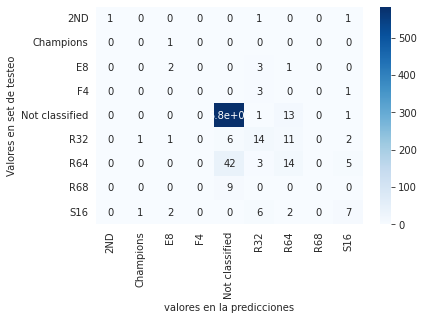

In [ ]:
#Evaluando el modelo 
# Realizando predicciones con datos no vistos antes
y_predict=clf.predict(X_test)
#Comparando con los resultados no vistos antes
from sklearn.metrics import  confusion_matrix

fig=sns.heatmap(confusion_matrix(y_test,y_predict), cmap='Blues', annot=True,xticklabels=clf.classes_,yticklabels=clf.classes_)
fig.set(ylabel='Valores en set de testeo', xlabel='valores en la predicciones')
plt.show()


Está claro que para ganar un camponato, en general, tienes que meter más puntos que los demás equipos y debes permitir que te metan menos. Partiendo de esta premisa se generará una ecuación de regresión lineal para determinar cuantos juegos puede ganar un equipo en función de sus estadísticas de eficiencia ofensiva y defensiva.

In [ ]:
#Standarizando los datos
dataframe=df3.loc[:][['W','ADJDE','ADJOE']]
scaler=StandardScaler()
scaler.fit(dataframe)
dataframe2=scaler.transform(dataframe)
dataframe2=pd.DataFrame(dataframe2)
dataframe2.columns=dataframe.columns

In [ ]:
#Creando arreglos para utilizar con scikit learn
#verificando que no exista colinearidad entre mis variables descriptoras
X=np.array(dataframe2.loc[:,['ADJDE','ADJOE']])
y=np.array(dataframe2.iloc[:,0])
dataframe2.loc[:,['ADJDE','ADJOE']].corr()

,ADJDE,ADJOE
ADJDE,1.000000,-0.483926
ADJOE,-0.483926,1.000000


In [ ]:
#Creando el modelo de regresión
reg=LinearRegression().fit(x,y)

In [ ]:
#Este modelo puede predecir el 70% de los datos aprendidos
reg.score(x,y)

0.7076197566178195

In [ ]:
#Separando los datos en entrenamiento y testeo:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [ ]:
#Creando el modelo
clf=LinearRegression().fit(X_train,y_train)

In [ ]:
#Calculando el valor de accuracy para el clasificador
clf.score(X_train,y_train)

0.7134862096652617

In [ ]:

clf.coef_

array([-0.42854304,  0.54306791])


$$
\large
W=-0.428*ADJDE+0.543*ADJOE
$$

La ecuación obtenida para predecir el número de juegos ganados hace mucho sentido: Entre mas alto es el valor de la eficiencia defensiva, significa que el equipo permite mas canastas, por eso tiene un factor negativo que reduce el número de juegos ganados. Por el contrario, la eficiencia ofensiva tiene un factor positivo, ya que entre los equipos que más puntos metan por cada 100 ofensivas, por lo general ganarán más juegos.